In [1]:
import pandas as pd
import os
import time
import keras_ocr
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import string

In [2]:
detector = keras_ocr.detection.Detector()
alphabet = string.digits
recognizer = keras_ocr.recognition.Recognizer(
    alphabet=alphabet,
    weights='kurapan'
)
recognizer.compile()
pipeline = keras_ocr.pipeline.Pipeline(detector=detector, recognizer=recognizer)

Looking for C:\Users\mfortier\.keras-ocr\craft_mlt_25k.h5
Provided alphabet does not match pretrained alphabet. Using backbone weights only.
Looking for C:\Users\mfortier\.keras-ocr\crnn_kurapan_notop.h5


In [5]:
subdir_path = 'L:/DATA/ISIS/raw_upload_20230421/R014207869/B1-34-49 ISIS-A C-198-00/'

In [6]:
images = [
    keras_ocr.tools.read(img) for img in [subdir_path + 'Image0005.png',
                                          subdir_path + 'Image0006.png']
]

In [7]:
# generate text predictions from the images
prediction_groups = pipeline.recognize(images)

1/1 [==============================] - 2s 2s/step


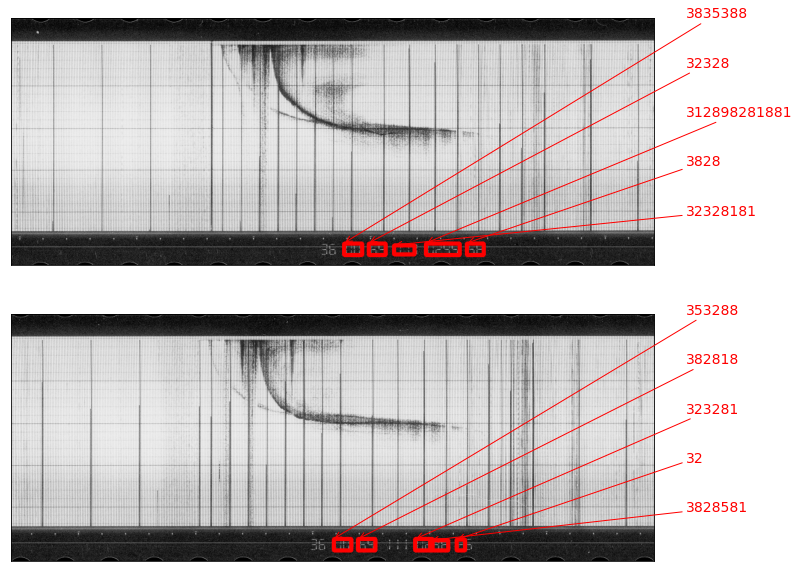

In [8]:
# plot the text predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(15, 10))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, 
                                    predictions=predictions, 
                                    ax=ax)

Clearly the default recognizer is not adequate, as it can sometimes classify fuzzy numbers as letters.

We will need to 'fine-tune' the recognizer to only recognize numbers:

Ref: https://keras-ocr.readthedocs.io/en/latest/examples/fine_tuning_recognizer.html <br>
Ref (better): https://keras-ocr.readthedocs.io/en/stable/examples/end_to_end_training.html <br>
Ref: https://github.com/faustomorales/keras-ocr/issues/54